<h2 align="center">Image Compression with K-means Clustering</h2>

### Importing Libraries

In [12]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [13]:
plt.rcParams['figure.figsize'] = (20, 12)

### Data Preprocessing 

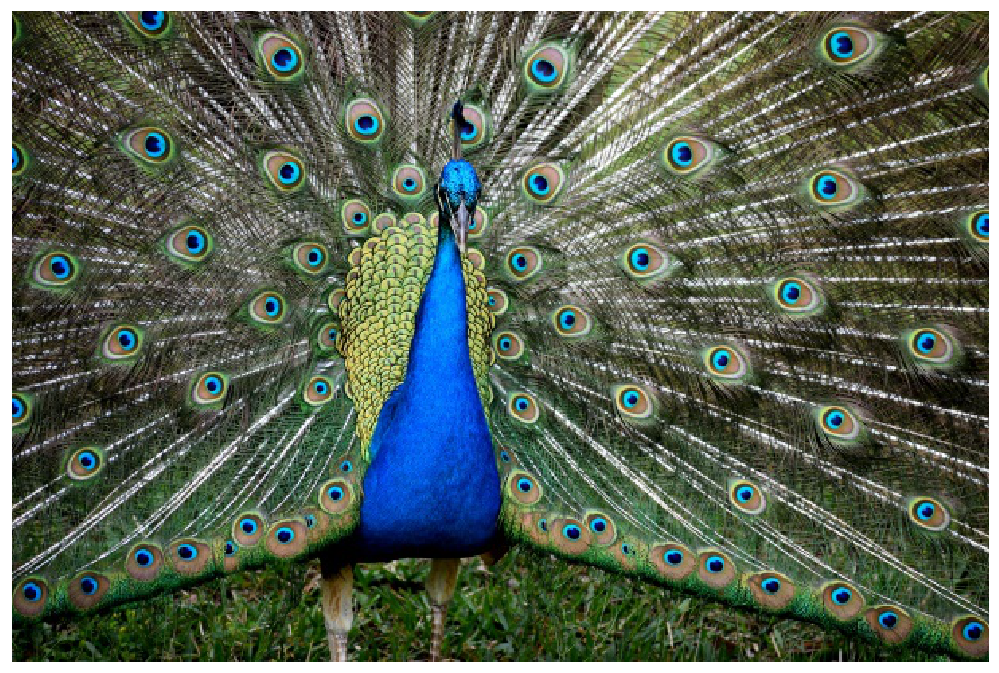

In [14]:
img = io.imread('images/3-peacock.jpg')
ax = plt.axes(xticks=[] ,yticks=[])
ax.imshow(img);

In [15]:
img.shape            # gives (height, width, no.of layers rgb =3)
          

(410, 615, 3)

In [16]:
imgdata =(img/ 255.0).reshape(410*615 , 3)
imgdata.shape

(252150, 3)

### Visualizing the Color Space using Point Clouds

In [17]:
from plot_utils import plot_utils    # imported from already created plot_utils.py file

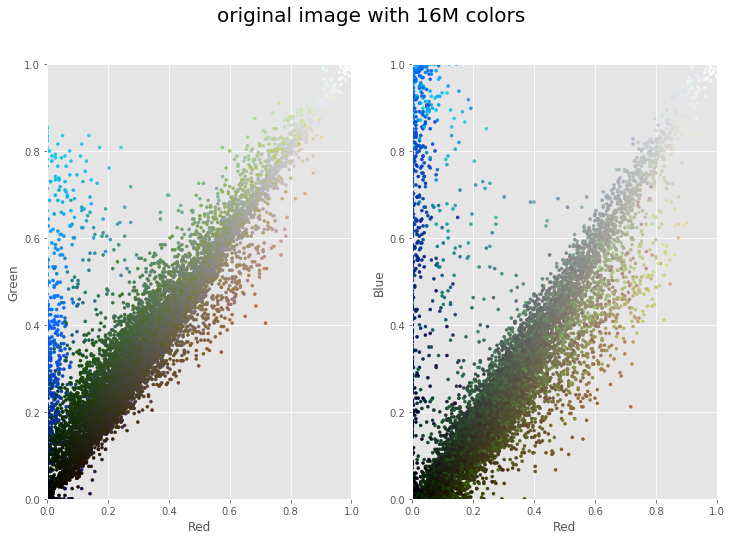

In [18]:
x= plot_utils(imgdata , title="original image with 16M colors")
x.colorSpace()

### Visualizing the K-means Reduced Color Space

In [19]:
from sklearn.cluster import MiniBatchKMeans  # in sciket-learn library k means calculation is already defined but as we have very high resolution images so we import MiniBatchKMeans library to process the  HD images into smaller batches 

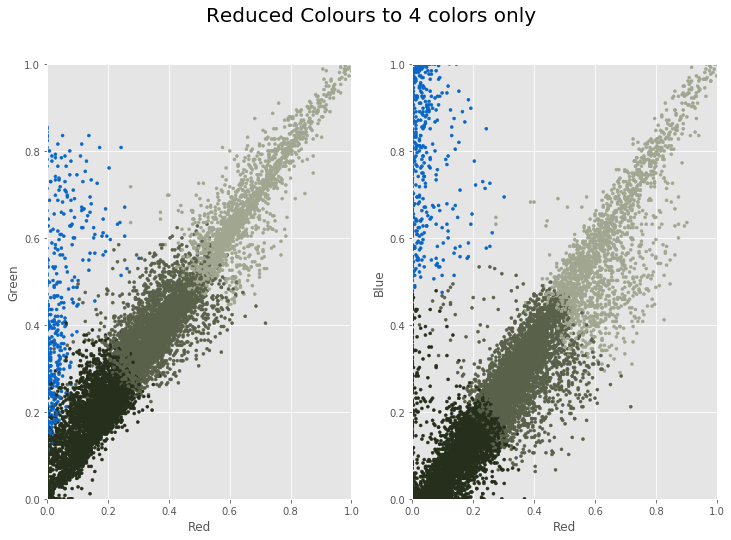

In [20]:
km = MiniBatchKMeans(4).fit(imgdata)            # 4 is value of k we can have any value km is assigned the kmeans calculated value for 4 colors
kc = km.cluster_centers_[km.predict(imgdata)]    # kc is assigned the predicted color for the new image from the original image
y = plot_utils(imgdata, colors= kc, title="Reduced Colours to 4 colors only")
y.colorSpace()

### K-means Image Compression with Interactive Controls

In [3]:
@interact    # this creates an interactive way to interact with the environment

# function for interactive environment 
def compression(image=os.listdir("images/"), no_of_colors= IntSlider(min=1, max=200, step=1, value=4, continuous_update=False, layout = dict(width='100%'))):
    input_img = io.imread('images/'+image)
    imgdata = (input_img/255.0).reshape(-1, 3)           # -1 is given in reshape parameter to automatically calclate the shape of the given image  
    km = MiniBatchKMeans(no_of_colors).fit(imgdata)
    kc = km.cluster_centers_[km.predict(imgdata)]
    
    compressed_img = np.reshape(kc, (input_img.shape))   # to create new compressed image with  k no.of colors
    
    fig, (x,y) = plt.subplots(1,2)
    fig.suptitle('K-Means Image Compression', fontsize=30)
    
    x.set_title('Compressed Image')
    x.set_xticks([])
    x.set_yticks([])
    x.imshow(compressed_img)
    
    y.set_title('Original Image')
    y.set_xticks([])
    y.set_yticks([])
    y.imshow(input_img)
    
    
    
    

NameError: name 'interact' is not defined